LAB-6

Name: ASHKAR KAMMALA PUTHENPURA ABDULKHADAR

StudenID: 8901587

Using SciKit-Learn, train a logistic regression model on the Iris dataset. Use all four features. Define only 2 labels: virginica and non-virginica. See the logistic regression notebook presented in class for a demonstration on how to set up these labels (3 points).
Provide insights about the model prediction. This is an open-ended part. But you can look into questions such as in which data instances is the model wrong? are there any shared properties for these cases? and how is the model doing, across a set of _performance metrics such as accuracy and confusion metric. (3 points)

In [10]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# Load the Iris dataset
iris_df = load_iris(as_frame=True)
X = iris_df.data
y = iris_df.target
X


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [12]:
# description
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [19]:
# Map the target labels to 'virginica' and 'non-virginica'
t_names = iris_df.target_names
y = np.where(y == 2, t_names[2], t_names[0])
t_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

DATA MODELING

In [14]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)# Split the data into training and testing sets
np.unique(y)# Mentions the unique value of target either virginica is true or false


array(['non-virginica', 'virginica'], dtype='<U13')

In [15]:
# Create and train the logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [20]:

y_pred = model.predict(X_test)# predictions on the test set
print("The predicted value from the logistic regression : \n",y_pred)
print("The test dataset target values : \n",y_test)

The predicted value on the test dataset using logistic regression : 
 ['non-virginica' 'non-virginica' 'virginica' 'non-virginica'
 'non-virginica' 'non-virginica' 'non-virginica' 'virginica'
 'non-virginica' 'non-virginica' 'virginica' 'non-virginica'
 'non-virginica' 'non-virginica' 'non-virginica' 'non-virginica'
 'virginica' 'non-virginica' 'non-virginica' 'virginica' 'non-virginica'
 'virginica' 'non-virginica' 'virginica' 'virginica' 'virginica'
 'virginica' 'virginica' 'non-virginica' 'non-virginica']
The test dataset target values : 
 ['non-virginica' 'non-virginica' 'virginica' 'non-virginica'
 'non-virginica' 'non-virginica' 'non-virginica' 'virginica'
 'non-virginica' 'non-virginica' 'virginica' 'non-virginica'
 'non-virginica' 'non-virginica' 'non-virginica' 'non-virginica'
 'virginica' 'non-virginica' 'non-virginica' 'virginica' 'non-virginica'
 'virginica' 'non-virginica' 'virginica' 'virginica' 'virginica'
 'virginica' 'virginica' 'non-virginica' 'non-virginica']


model evaluation

In [21]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


An accuracy score of 1.0 signifies that the model has achieved perfect accuracy. It means that there are no incorrect predictions made by this model.

In [23]:
# Create a confusion matrix
confusionMatrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusionMatrix)

Confusion Matrix:
[[19  0]
 [ 0 11]]


The confusion matrix has no False Positives and  no False Negatives. This indicates that the predictions are accurate.boom

In [24]:
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred, pos_label='virginica')
print("Precision:", precision)

Precision: 1.0


This indicates that all predicted positive values are true positives, which aligns with the entries in the confusion matrix.

In [25]:
from sklearn.metrics import recall_score

recall = recall_score(y_test, y_pred, pos_label='virginica')
print("Recall:", recall)

Recall: 1.0


A recall score of 1 indicates that the model correctly predicted 100% of the actual true values.

In [26]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred, pos_label='virginica')
print("F1-Score:", f1)

F1-Score: 1.0


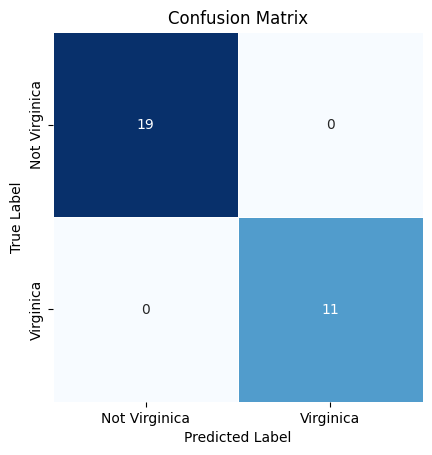

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

class_labels = ["Not Virginica", "Virginica"]

# Create heatmap
sns.heatmap(confusionMatrix, annot=True, cmap="Blues", fmt="d",
            linewidths=0.5, square=True, cbar=False,
            xticklabels=class_labels, yticklabels=class_labels)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")

plt.show()